In [1]:
from phase_portrait import *
%matplotlib inline

In [2]:
data= pd.read_excel('bitcoin-excel.xlsx')
data= data.drop(data.columns[2], axis=1)
data.columns=['date','value', 'volume', 'capitalization']
data=data[['date','value']]
# data=data.drop(0)
data=data.reset_index(drop=True)
data['date']= pd.to_datetime(data['date'], format='%d.%m.%Y')
data

,date,value
0,2021-11-16,60425.010644
1,2021-11-15,64016.035860
2,2021-11-14,64099.343163
3,2021-11-13,64264.021087
4,2021-11-12,63963.062127
...,...,...
2142,2016-01-05,431.960000
2143,2016-01-04,433.090000
2144,2016-01-03,430.010000
2145,2016-01-02,433.440000


In [3]:
normalize_date=''
phases=generate_phase_portrait(data, [1, 7, 30])

In [12]:
def generate_phase_portrait(df, slices, normalize=''):
    data = []
    for slice_period in slices:
        data.append(calc_phase_portrait(df.copy(), slice_period, normalize))
    return data

def calc_phase_portrait(df, slice_period=1, normalize=''):
    if normalize:
        normalization_value = df['value'][(df['date'] > pd.to_datetime(normalize, format='%d.%m.%Y'))].head(1).iloc[0]
        df['value'] = df['value'] / normalization_value
    else:
        df['value'] = df['value'] / 1000
    df = slice_data(df, slice_period)

    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

    x = df.index.to_series() + 1
    print(x)
    y = df['value']

    xx, deriv = get_phase_portrait(x, y, step_spline=.05, step_deriv=.01, deriv_num=2)

    tt = get_arange(x.shape[0], step=.0005)

    return x, y, xx, deriv, tt, slice_period, df['date']

In [5]:
deriv=phases[1][3]

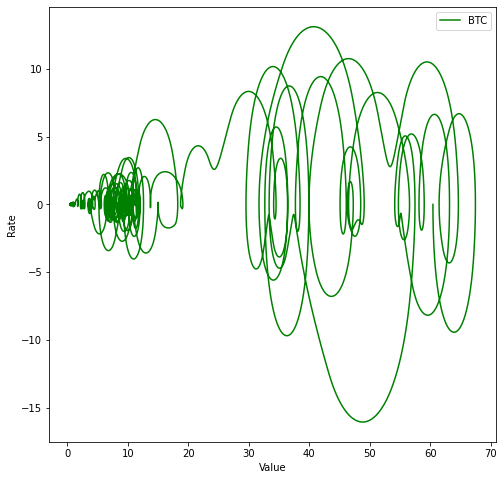

In [6]:
fig, ax = plt.subplots()
# ax.scatter(deriv[0], deriv[1], c=c_bar, s=0.05)
ax.plot(deriv[0], deriv[1], '-g')
#     ax.annotate(dates.iloc[-1].strftime('%d.%m.%y'), xy=(deriv[0][-1], deriv[1][-1]), color='black', ha="right")
ax.set_ylabel('Rate')
ax.set_xlabel('Value')

# plt.title('Сравнение показателей, нормализованных на 01.01.2000')
plt.legend(['BTC'], loc='best')

fig.set_figheight(8)
fig.set_figwidth(8)

# plt.savefig(f"Comparison_SnP_Nas_t30.png", dpi=200)

In [81]:
def get_mask_xx(x, xx, dates, start_date, end_date):
    date_filter = (dates >= pd.to_datetime(start_date, format='%d.%m.%Y')) & (
            dates <= pd.to_datetime(end_date, format='%d.%m.%Y'))
    filtered_x = x[date_filter]
    min_x, max_x = filtered_x.min(), filtered_x.max()
    return (xx >= min_x) & (xx <= max_x)

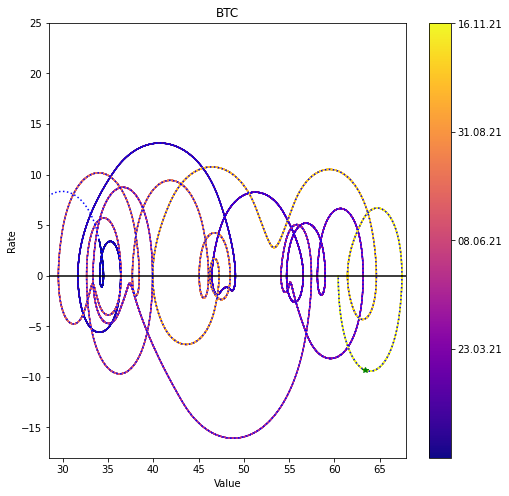

In [88]:
x, y, xx, deriv, tt, slice_period, dates=phases[1]
start_date1='01.01.2021'
end_date1='17.11.2021'
mask_00 = get_mask_tt(x, tt, dates, start_date1, end_date1)

# start_date2='01.01.2006'
# end_date2='01.01.2008'
# mask_08 = get_mask_tt(x, tt, dates, start_date2, end_date2)


fig, ax = plt.subplots()
# ax.plot(deriv[0], deriv[1])
ax.plot(deriv[0], deriv[1], ':b')
# line2, =ax.plot( deriv[0][mask_00], deriv[1][mask_00], '-r', label=f"{start_date1}-{end_date1}")
# line3, =ax.plot( deriv[0][mask_08], deriv[1][mask_08], '-g', label=f"{start_date2}-{end_date2}")
# ax.plot(deriv[0][mask], deriv[1][mask], '-')
###################################
cmap = plt.cm.plasma
norm = plt.Normalize(tt[mask_00].min(), tt[mask_00].max())
c_bar=plt.cm.plasma(np.linspace(0, 1, tt[mask_00].shape[0]))

m_dates=dates_mask(dates, start_date1, end_date1)
m_xx=get_mask_xx(x, xx, dates, start_date1, end_date1)

ax.scatter(deriv[0][mask_00], deriv[1][mask_00], c=c_bar, s=0.1)
ticks_num=5
cbar = fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm), ticks=get_ticks(xx[m_xx], ticks_num), orientation='vertical')
cbar.ax.set_yticklabels(map(lambda x: x.strftime('%d.%m.%y'), get_ticks(dates[m_dates], ticks_num)))
###################################

plt.title('BTC')
ax.set_ylabel('Rate')
ax.set_xlabel('Value')
# plt.legend(handles=[line2], loc='best') #, line3
# plt.legend([f"{start_date}-{end_date}"], loc='best')

# plt.legend(['t=1', 't=7', 't=30' ], loc='best')
plt.xlim((deriv[0][mask_00].min()-1, deriv[0][mask_00].max()+0.5))
ax.set_ylim([-18, 25])
plt.axhline(y=0, color='k', linestyle='-')

# xycoords='data',
# xytext=(0.8, 0.95), textcoords='axes fraction',
# arrowprops=dict(facecolor='black', shrink=0.05),
# horizontalalignment='right', verticalalignment='top'

ax.plot(deriv[0][-1000], deriv[1][-1000], '*g', markersize=6)

# ax.plot(deriv[0][mask_000][deriv[1][mask_00]==deriv[1][mask_00].min()], deriv[1][mask_00][deriv[1][mask_00]==deriv[1][mask_00].min()], '*g', markersize=6)
# ax.annotate(dates.iloc[253].strftime('%d.%m.%y'),  
#             xy=(deriv[0][mask_00][deriv[1][mask_00]==deriv[1][mask_00].min()], deriv[1][mask_00][deriv[1][mask_00]==deriv[1][mask_00].min()]), 
#             color='black', 
#             ha="left", textcoords='axes fraction', xytext=(0.6, 0.035))

# plt.savefig(f"{filename}.png", dpi=200)

fig.set_figheight(8)
fig.set_figwidth(8)
plt.show()

In [156]:
def get_filename(name, min_date, max_date, freq='', add=''):
    if freq:
        return f"{name}_{min_date}_to_{max_date}_f_{freq}"
    if add:
        return f"{name}_{min_date}_to_{max_date}_{add}"
    return f"{name}_{min_date}_to_{max_date}"

filename = get_filename("Nasdaq",start_date1, end_date1, add='scaled')
filename

'Nasdaq_01.01.2000_to_01.01.2003'